In [1]:
import os
import torch
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import Tuple, Optional
from glob import glob
from src import build_model

In [2]:
@dataclass
class set_args:
    dim: int=32
    init_dim: Optional[int]=None
    out_dim: Optional[int]=None
    dim_mults: Tuple[int]=(1, 2, 4, 8)
    channels: int=1
    self_condition: bool=False
    resnet_block_groups: int=4
    steps: int=4000
    device: str="cuda"

In [3]:
args = set_args()
ddim = build_model(args)
ddim.load_state_dict(
    torch.load("weight.pth", map_location=args.device)
)
ddim.eval()
print("All keys matched successfully")

All keys matched successfully


In [4]:
imgs = ddim.sample(image_size=32, batch_size=10, step=4000)

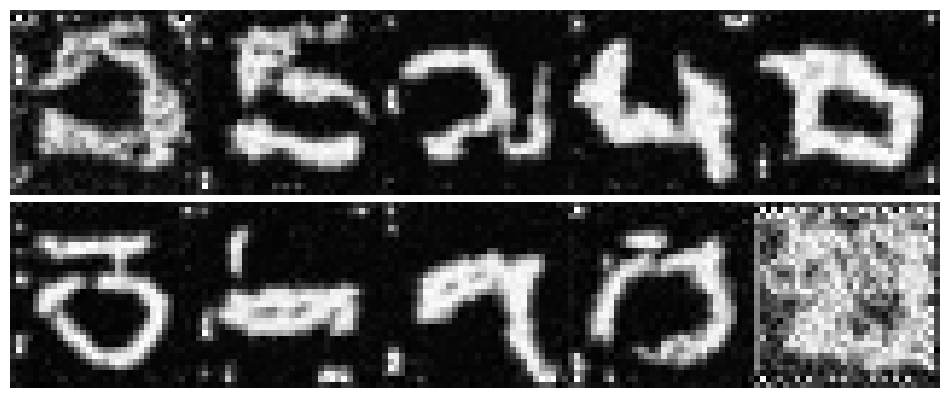

In [5]:
plt.figure(figsize=(12, 5))
for i, img in enumerate(imgs[-1]):
    plt.subplot(2, 5, i+1)
    plt.imshow(img[0], cmap="gray")
    plt.axis("off")
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()